Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

Mouting google drive and reading csv file

In [ ]:
drive.mount('/content/drive')
sourcedata = pd.read_csv("/content/drive/MyDrive/Dataset_Heart_Disease_2020.csv")

Mounted at /content/drive


Displaying the shape and info of loaded data set

In [ ]:
sourcedata.shape
sourcedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Checking for Null and duplicate values and handling data

In [ ]:
sourcedata.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
sourcedata.duplicated().sum()

18078

In [ ]:
sourcedata.drop_duplicates(inplace=True)

In [ ]:
sourcedata.duplicated().sum()

0

In [ ]:
sourcedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  int64  
 6   MentalHealth      301717 non-null  int64  
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  int64  
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

Checking for unique category and value count in each categorical columns

In [ ]:
sourcedata['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [ ]:
sourcedata['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [ ]:
sourcedata['Smoking'].value_counts()

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [ ]:
sourcedata['AlcoholDrinking'].value_counts()

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [ ]:
sourcedata['Stroke'].value_counts()

No     289653
Yes     12064
Name: Stroke, dtype: int64

In [ ]:
sourcedata['DiffWalking'].value_counts()

No     257362
Yes     44355
Name: DiffWalking, dtype: int64

In [ ]:
sourcedata['Sex'].value_counts()

Female    159671
Male      142046
Name: Sex, dtype: int64

In [ ]:
sourcedata['AgeCategory'].value_counts()

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [ ]:
sourcedata['Race'].value_counts()

White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64

In [ ]:
sourcedata['PhysicalActivity'].value_counts()

Yes    230412
No      71305
Name: PhysicalActivity, dtype: int64

In [ ]:
sourcedata['GenHealth'].value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [ ]:
sourcedata['Asthma'].value_counts()

No     259066
Yes     42651
Name: Asthma, dtype: int64

In [ ]:
sourcedata['KidneyDisease'].value_counts()

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [ ]:
sourcedata['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

Replacing Yes and No values 1 and 0

In [ ]:
sourcedata=sourcedata.replace("No",0)
sourcedata=sourcedata.replace("Yes",1)
sourcedata=sourcedata.replace("Male",0)
sourcedata=sourcedata.replace("Female",1)
sourcedata=sourcedata.replace("No, borderline diabetes",0)
sourcedata=sourcedata.replace("Yes (during pregnancy)",1)

In [ ]:
sourcedata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,55-59,White,1,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,80 or older,White,0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,65-69,White,1,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,75-79,White,0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,40-44,White,0,1,Very good,8,0,0,0


Deleting unwanted features

In [ ]:
sourcedata = sourcedata.drop('Race',axis=1)

In [ ]:
sourcedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  int64  
 6   MentalHealth      301717 non-null  int64  
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  object 
 10  Diabetic          301717 non-null  int64  
 11  PhysicalActivity  301717 non-null  int64  
 12  GenHealth         301717 non-null  object 
 13  SleepTime         301717 non-null  int64  
 14  Asthma            301717 non-null  int64  
 15  KidneyDisease     301717 non-null  int64  
 16  SkinCancer        30

Categorical feature encoding

In [ ]:
dummydata = pd.get_dummies(sourcedata['GenHealth'], prefix="GenHealth", drop_first=True)
dummydata2 = pd.get_dummies(sourcedata['AgeCategory'], prefix="AgeCategory", drop_first=True)

In [ ]:
dummydata.head()

,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [ ]:
dummydata2.head()

,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
concatdata = [sourcedata, dummydata, dummydata2]
resultset = pd.concat(concatdata, axis=1)

In [ ]:
resultset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HeartDisease             301717 non-null  int64  
 1   BMI                      301717 non-null  float64
 2   Smoking                  301717 non-null  int64  
 3   AlcoholDrinking          301717 non-null  int64  
 4   Stroke                   301717 non-null  int64  
 5   PhysicalHealth           301717 non-null  int64  
 6   MentalHealth             301717 non-null  int64  
 7   DiffWalking              301717 non-null  int64  
 8   Sex                      301717 non-null  int64  
 9   AgeCategory              301717 non-null  object 
 10  Diabetic                 301717 non-null  int64  
 11  PhysicalActivity         301717 non-null  int64  
 12  GenHealth                301717 non-null  object 
 13  SleepTime                301717 non-null  int64  
 14  Asth

Deleting original fields(AgeCategory,GenHealth) after applying dummies

In [ ]:
resultset = resultset.drop('AgeCategory',axis=1)
resultset = resultset.drop('GenHealth',axis=1)

In [ ]:
resultset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HeartDisease             301717 non-null  int64  
 1   BMI                      301717 non-null  float64
 2   Smoking                  301717 non-null  int64  
 3   AlcoholDrinking          301717 non-null  int64  
 4   Stroke                   301717 non-null  int64  
 5   PhysicalHealth           301717 non-null  int64  
 6   MentalHealth             301717 non-null  int64  
 7   DiffWalking              301717 non-null  int64  
 8   Sex                      301717 non-null  int64  
 9   Diabetic                 301717 non-null  int64  
 10  PhysicalActivity         301717 non-null  int64  
 11  SleepTime                301717 non-null  int64  
 12  Asthma                   301717 non-null  int64  
 13  KidneyDisease            301717 non-null  int64  
 14  Skin

Plotting categorical attributes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

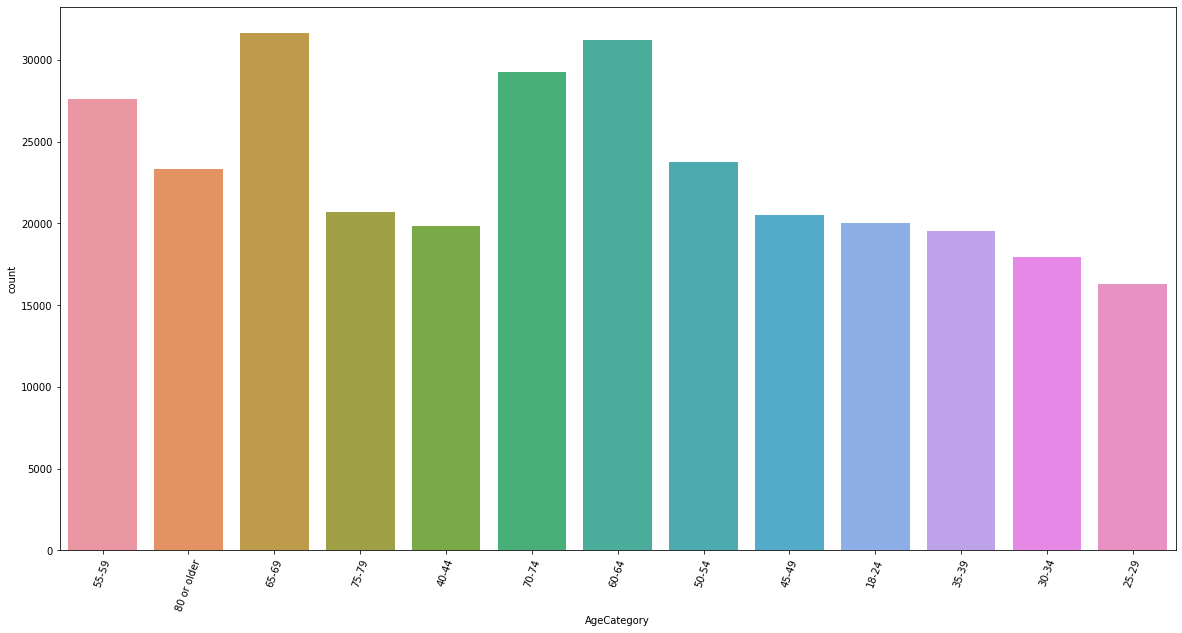

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='AgeCategory',data=sourcedata)
plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

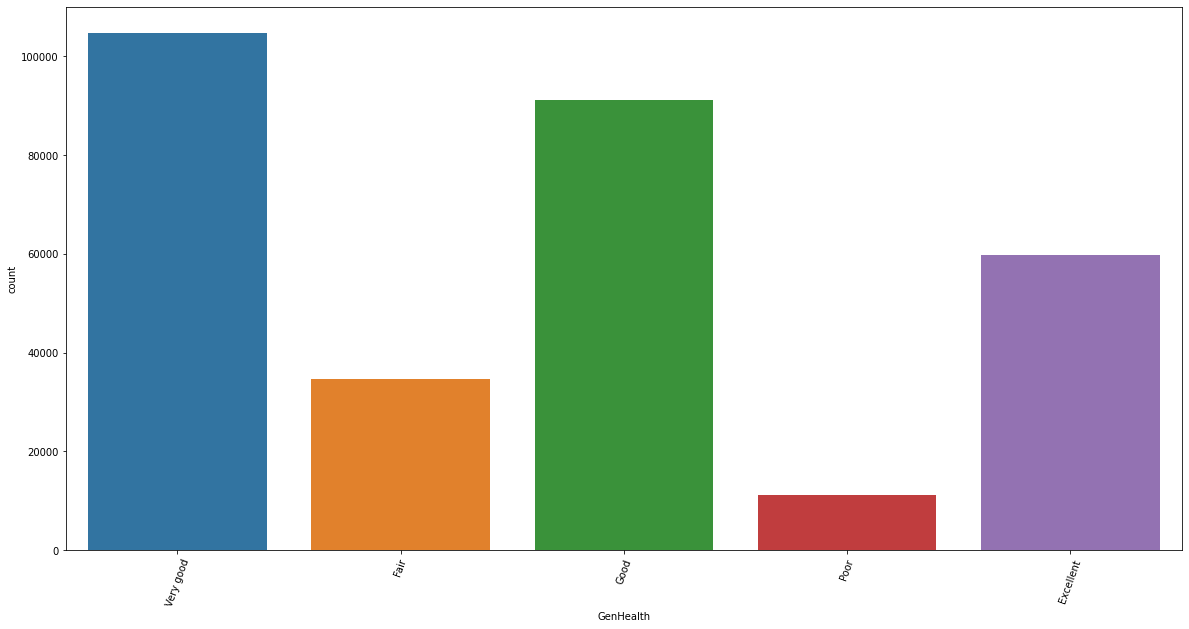

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='GenHealth',data=sourcedata)
plt.xticks(rotation=70)

Correlation Graph



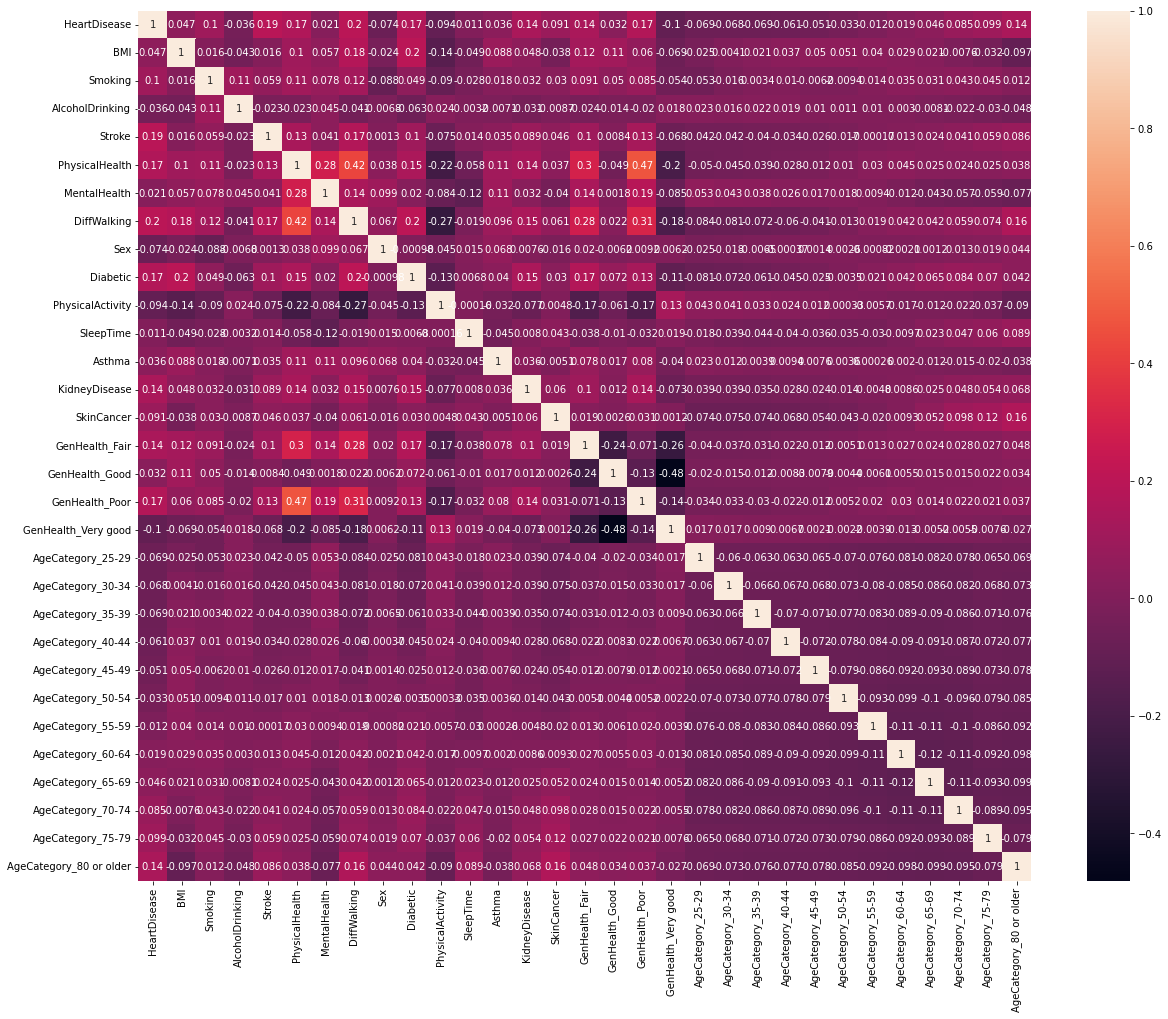

In [ ]:
corr = resultset.corr()
top_feature = corr.index
plt.subplots(figsize=(20, 16))
top_corr = resultset[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Feature Scaling

In [ ]:
resultset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HeartDisease             301717 non-null  int64  
 1   BMI                      301717 non-null  float64
 2   Smoking                  301717 non-null  int64  
 3   AlcoholDrinking          301717 non-null  int64  
 4   Stroke                   301717 non-null  int64  
 5   PhysicalHealth           301717 non-null  int64  
 6   MentalHealth             301717 non-null  int64  
 7   DiffWalking              301717 non-null  int64  
 8   Sex                      301717 non-null  int64  
 9   Diabetic                 301717 non-null  int64  
 10  PhysicalActivity         301717 non-null  int64  
 11  SleepTime                301717 non-null  int64  
 12  Asthma                   301717 non-null  int64  
 13  KidneyDisease            301717 non-null  int64  
 14  Skin

In [ ]:
categorical=[]
numerical=[]

In [ ]:
for column in resultset.columns:
    if resultset[column].nunique() < 5:
        categorical.append(column)
    else:
        numerical.append(column)

In [ ]:
categorical

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor',
 'GenHealth_Very good',
 'AgeCategory_25-29',
 'AgeCategory_30-34',
 'AgeCategory_35-39',
 'AgeCategory_40-44',
 'AgeCategory_45-49',
 'AgeCategory_50-54',
 'AgeCategory_55-59',
 'AgeCategory_60-64',
 'AgeCategory_65-69',
 'AgeCategory_70-74',
 'AgeCategory_75-79',
 'AgeCategory_80 or older']

In [ ]:
numerical

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [ ]:
resultset[numerical] = st.fit_transform(resultset[numerical]) 

In [ ]:
resultset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,0,-1.830820,1,0,0,-0.070301,3.183766,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,-1.252600,0,0,1,-0.438823,-0.507054,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,-0.287869,1,0,0,2.017986,3.183766,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,-0.654281,0,0,0,-0.438823,-0.507054,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.731583,0,0,0,3.000709,-0.507054,1,1,0,...,0,1,0,0,0,0,0,0,0,0


Test and Train data split

In [ ]:
X=resultset.drop('HeartDisease',axis=1)
y = resultset['HeartDisease']

In [ ]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
0,-1.830820,1,0,0,-0.070301,3.183766,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.252600,0,0,1,-0.438823,-0.507054,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.287869,1,0,0,2.017986,3.183766,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,-0.654281,0,0,0,-0.438823,-0.507054,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.731583,0,0,0,3.000709,-0.507054,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.159547,1,0,0,0.421060,-0.507054,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
319791,0.216141,1,0,0,-0.438823,-0.507054,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
319792,-0.649643,0,0,0,-0.438823,-0.507054,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
319793,0.675316,0,0,0,-0.438823,-0.507054,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
197559,-1.773616,1,0,0,-0.438823,-0.260999,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
286926,1.657054,0,0,0,-0.438823,-0.507054,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
250708,-0.227573,0,0,1,2.017986,-0.507054,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
155034,-0.623360,1,0,0,-0.438823,3.183766,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
102540,-0.972766,0,0,0,-0.438823,-0.507054,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123014,-0.134810,0,0,0,-0.438823,-0.507054,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
273086,-1.619012,1,0,0,-0.438823,2.568629,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
135728,-0.015765,0,0,0,0.666741,1.953493,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
151731,-0.929477,1,0,0,0.175380,3.183766,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older
284798,1.105116,0,0,0,-0.438823,-0.260999,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
206219,-0.099251,0,0,0,-0.438823,-0.507054,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
298442,-0.410006,0,0,0,-0.193142,-0.260999,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
119751,1.550377,1,0,1,-0.315982,-0.384027,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
103309,-0.173461,0,0,0,-0.438823,-0.260999,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255606,-0.018857,1,0,0,-0.438823,-0.507054,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
67510,-1.201580,0,0,0,-0.438823,3.183766,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
123782,-0.085337,0,0,0,-0.438823,0.231110,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
313001,1.814750,1,0,0,-0.438823,-0.507054,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_test

284798    0
206219    0
298442    0
119751    1
103309    0
         ..
255606    0
67510     0
123782    0
313001    0
261942    0
Name: HeartDisease, Length: 60344, dtype: int64

In [ ]:
y_train

197559    0
286926    0
250708    1
155034    0
102540    0
         ..
123014    0
273086    0
135728    0
151731    1
125198    0
Name: HeartDisease, Length: 241373, dtype: int64

Machine Learning Algorithms - Imbalanced dataset

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import metrics

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logi = LogisticRegression()
Logi.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predlogi = Logi.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predlogi)

0.9109439215166379

In [ ]:
print(metrics.confusion_matrix(y_test,y_predlogi))
print(metrics.classification_report(y_test, y_predlogi))

[[54404   490]
 [ 4884   566]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.54      0.10      0.17      5450

    accuracy                           0.91     60344
   macro avg       0.73      0.55      0.56     60344
weighted avg       0.88      0.91      0.88     60344



Rnadom Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_predrf = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predrf)

0.8951842768129391

In [ ]:
print(metrics.confusion_matrix(y_test,y_predrf))
print(metrics.classification_report(y_test, y_predrf))

[[53326  1568]
 [ 4757   693]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     54894
           1       0.31      0.13      0.18      5450

    accuracy                           0.90     60344
   macro avg       0.61      0.55      0.56     60344
weighted avg       0.86      0.90      0.87     60344



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knei = KNeighborsClassifier()
knei.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predknei = knei.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predknei)

0.9013986477528835

In [ ]:
print(metrics.confusion_matrix(y_test,y_predknei))
print(metrics.classification_report(y_test, y_predknei))

[[53794  1100]
 [ 4850   600]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54894
           1       0.35      0.11      0.17      5450

    accuracy                           0.90     60344
   macro avg       0.64      0.55      0.56     60344
weighted avg       0.87      0.90      0.88     60344



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preddt = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_preddt)

0.854136285297627

In [ ]:
print(metrics.confusion_matrix(y_test,y_preddt))
print(metrics.classification_report(y_test, y_preddt))

[[50256  4638]
 [ 4164  1286]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     54894
           1       0.22      0.24      0.23      5450

    accuracy                           0.85     60344
   macro avg       0.57      0.58      0.57     60344
weighted avg       0.86      0.85      0.86     60344



Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predgnb = gnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predgnb)

0.7435370542224579

In [ ]:
print(metrics.confusion_matrix(y_test,y_predgnb))
print(metrics.classification_report(y_test, y_predgnb))

[[41036 13858]
 [ 1618  3832]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     54894
           1       0.22      0.70      0.33      5450

    accuracy                           0.74     60344
   macro avg       0.59      0.73      0.59     60344
weighted avg       0.89      0.74      0.80     60344



Accuracy, F1 Score, Precision and Recall

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
final_result = pd.DataFrame({'Models':['Logistic Regression','Random Forest','KNN','Decision Tree','Gaussian NB'],
                          'Accuracy':[accuracy_score(y_test,y_predlogi),accuracy_score(y_test,y_predrf),accuracy_score(y_test,y_predknei),accuracy_score(y_test,y_preddt),accuracy_score(y_test,y_predgnb)],
                          'F1 Score':[f1_score(y_test,y_predlogi),f1_score(y_test,y_predrf),f1_score(y_test,y_predknei),f1_score(y_test,y_preddt),f1_score(y_test,y_predgnb)],
                          'Recall':[recall_score(y_test,y_predlogi),recall_score(y_test,y_predrf),recall_score(y_test,y_predknei),recall_score(y_test,y_preddt),recall_score(y_test,y_predgnb)],
                          'Precision':[precision_score(y_test,y_predlogi),precision_score(y_test,y_predrf),precision_score(y_test,y_predknei),precision_score(y_test,y_preddt),precision_score(y_test,y_predgnb)]
                          })

In [ ]:
final_result

,Models,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.910944,0.173993,0.103853,0.535985
1,Random Forest,0.895184,0.179743,0.127156,0.306502
2,KNN,0.901399,0.167832,0.110092,0.352941
3,Decision Tree,0.854136,0.226130,0.235963,0.217083
4,Gaussian NB,0.743537,0.331201,0.703119,0.216620


OverSampling using SMOTE

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()

In [ ]:
x_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

Logistic Regression

In [ ]:
y_predlogismt = Logi.predict(x_train_smt)
accuracy_score(y_train_smt,y_predlogismt)

0.5225653801659668

Random Foreest

In [ ]:
y_predrfsmt = rf.predict(x_train_smt)
accuracy_score(y_train_smt,y_predrfsmt)

0.7192342026398011

Decision Tree

In [ ]:
y_preddtsmt = dt.predict(x_train_smt)
accuracy_score(y_train_smt,y_preddtsmt)

0.7401462912525847

Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x_undersamp = resultset.iloc[:, 1:]
y_undersamp = resultset['HeartDisease']
x_under, y_under = under_sampler.fit_resample(x_undersamp, y_undersamp)

print(f'Before undersampling: {Counter(resultset["HeartDisease"])}')
print(f'After undersampling: {Counter(y_under)}')

Before undersampling: Counter({0: 274456, 1: 27261})
After undersampling: Counter({0: 54522, 1: 27261})


Logistic Regression

In [ ]:
y_predlogiun = Logi.predict(x_undersamp)
accuracy_score(y_undersamp,y_predlogiun)

0.9112347000666187

Random forest

In [ ]:
y_predrfun = rf.predict(x_undersamp)
accuracy_score(y_undersamp,y_predrfun)

0.9759808032030015

Decision Tree

In [ ]:
y_preddtun = dt.predict(x_undersamp)
accuracy_score(y_undersamp,y_preddtun)

0.9678274674612303

KNN

In [ ]:
y_predkneiun = knei.predict(x_undersamp)
accuracy_score(y_undersamp,y_predkneiun)

KeyboardInterrupt: ignored

Naive bayes

In [ ]:
y_predgnbun = gnb.predict(x_undersamp)
accuracy_score(y_undersamp,y_predgnbun)

0.7463218844148656

In [ ]:
final_result_afterus = pd.DataFrame({'Models':['Logistic Regression','Random Forest','Decision Tree','Gaussian NB'],
                          'Accuracy':[accuracy_score(y_undersamp,y_predlogiun),accuracy_score(y_undersamp,y_predrfun),accuracy_score(y_undersamp,y_preddtun),accuracy_score(y_undersamp,y_predgnbun)],
                          'F1 Score':[f1_score(y_undersamp,y_predlogiun),f1_score(y_undersamp,y_predrfun),f1_score(y_undersamp,y_preddtun),f1_score(y_undersamp,y_predgnbun)],
                          'Precision':[precision_score(y_undersamp,y_predlogiun),precision_score(y_undersamp,y_predrfun),precision_score(y_undersamp,y_preddtun),precision_score(y_undersamp,y_predgnbun)]
                          })

In [ ]:
final_result_afterus

,Models,Accuracy,F1 Score,Precision
0,Logistic Regression,0.911235,0.176901,0.545386
1,Random Forest,0.975981,0.856770,0.928822
2,Decision Tree,0.967827,0.820570,0.827036
3,Gaussian NB,0.746322,0.338075,0.221184
